## Mini Project on Machine Learning

In this project we are supposed to classify the last variable using Random Forest Classifier
#### Pre Requists:
1. Data set (.csv format)
2. Import necessary libraries

## What is Random Forest?
1. Random forest is a supervised learning algorithm.
2. Used to solve regression and classification problems.
3. The outcome based on the predictions of the decision trees.
4. It uses bagging and feature randomness.
5. Prediction is more accurate than that of any individual tree.

## Work Flow
1. Data
2. Data Analysis
3. Data preprocessing
4. Model
5. Training the model
6. Testing

In [21]:
#importing nescessary libraries
import pandas as pd ##read the data
import numpy as np
import matplotlib.pyplot as plt ##visualize the data
import seaborn as sns ##visualize the data
from sklearn.model_selection import train_test_split ##split the data
from sklearn.ensemble import RandomForestClassifier ## model to train and test
from sklearn.metrics import accuracy_score ##evaluate the model

In [80]:
glass_data=pd.read_csv("glass_classification.csv")
glass_data

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#Analysing the data
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [5]:
glass_data.isnull().sum()

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [6]:
glass_data.shape

(214, 11)

## Analysis
1. No  null values are there in the tabular data
2. 9 rows of float values and 2 rows of int values
3. 214 rows and 11 columns

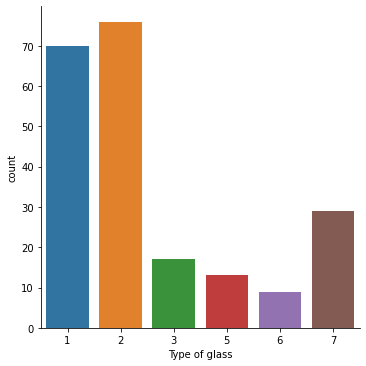

In [20]:
#Plot 
sns.catplot(x='Type of glass',data=glass_data,kind='count')

## Observation
1. We have 7 types of glass
2. Most of the maximum types lies in 1 and 2
3. We can also visualise the count of the types

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

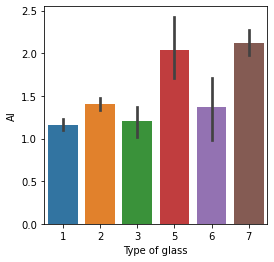

In [26]:
plt.figure(figsize=(4,4))
sns.barplot(x='Type of glass',data=glass_data,y='Al')

AI and types of glass are directly proportional 

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

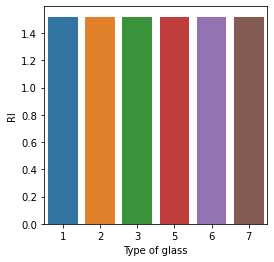

In [27]:
plt.figure(figsize=(4,4))
sns.barplot(x='Type of glass',data=glass_data,y='RI')

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

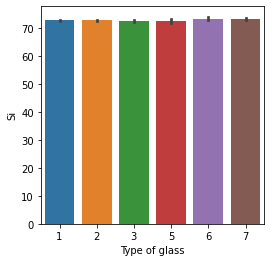

In [28]:
plt.figure(figsize=(4,4))
sns.barplot(x='Type of glass',data=glass_data,y='Si')

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

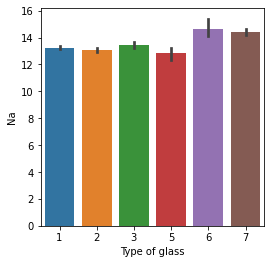

In [29]:
plt.figure(figsize=(4,4))
sns.barplot(x='Type of glass',data=glass_data,y='Na')

<AxesSubplot:xlabel='Type of glass', ylabel='Ca'>

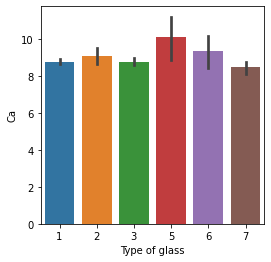

In [30]:
plt.figure(figsize=(4,4))
sns.barplot(x='Type of glass',data=glass_data,y='Ca')

## Correlation

<AxesSubplot:>

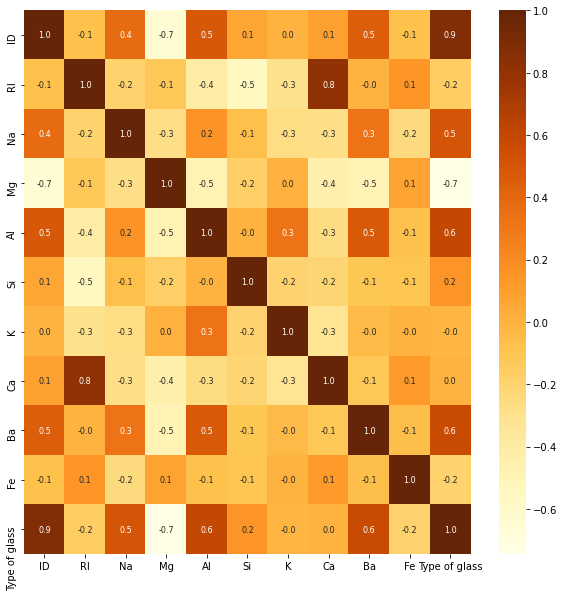

In [31]:
correlation=glass_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap="YlOrBr")

## Observartion
From above heat map we can observer negative and positive correlation
1. Positive correlation - increases target also increases vice versa
2. Negative correlation - increases the target descreases vice versa
   
It says which columns are positively and negatively correlated the 1.0 diagnal is not significant  

In [35]:
## Data preprocessing
X=glass_data.drop('Type of glass',axis=1)
print(X)

      ID       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 10 columns]


## Label encoding

In [92]:
Y=glass_data['Type of glass'].apply(lambda y:1 if y<=2 else 0)

In [93]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    0
210    0
211    0
212    0
213    0
Name: Type of glass, Length: 214, dtype: int64

## Train and test 

In [94]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=1)

In [95]:
print(Y.shape,Y_train.shape,Y_test.shape)
print(X.shape,X_train.shape,X_test.shape)

(214,) (171,) (43,)
(214, 10) (171, 10) (43, 10)


## Training the model

In [96]:
model_classifier=RandomForestClassifier()

In [97]:
model_classifier.fit(X_train,Y_train)

RandomForestClassifier()

## Evaluating the model via Accuracy

In [98]:
X_train_prediction=model_classifier.predict(X_train)
train_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy score of training model :",train_accuracy)

Accuracy score of training model : 1.0


In [99]:
X_test_prediction=model_classifier.predict(X_test)
test_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy score of test data : ",test_accuracy)

Accuracy score of test data :  0.9767441860465116


## Building a predictive system

In [104]:
input_data = (71,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.0,0.12)
input_data_numpy_array=np.asarray(input_data)

In [105]:
reshaped=input_data_numpy_array.reshape(1,-1)

In [106]:
reshaped

array([[71.     ,  1.51574, 14.86   ,  3.67   ,  1.74   , 71.87   ,
         0.16   ,  7.36   ,  0.     ,  0.12   ]])

In [107]:
prediction=model_classifier.predict(reshaped)
print(prediction)

[1]


### The model has predicted the values perfectly for the type of glass